<a href="https://colab.research.google.com/github/MizanMustakim/BIT_Machine_Learning_Course_Assignments_2022/blob/main/clustering_on_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

### Loading the dataset

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Setting the independent features (input)
X = iris_df.values

### K-Means Clustering

Finding the optimal number of clusters for K-Means using ***Elbow Method***

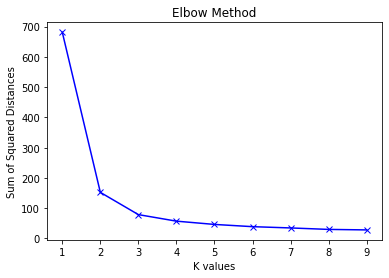

In [ ]:
# Arbitrarily selecting a range of values for K
K = range(1,10)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

Fit the model and get the labels

In [ ]:
# Creating the KMeans object and fitting it to the Iris data
iris_kmeans = KMeans(n_clusters=3).fit(X)
# Predicting the cluster labels
labels = iris_kmeans.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Silhoutte Coefficient

In [ ]:
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, labels, metric="euclidean")
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Iris Dataset Clusters: 0.55


Plotting the clusters

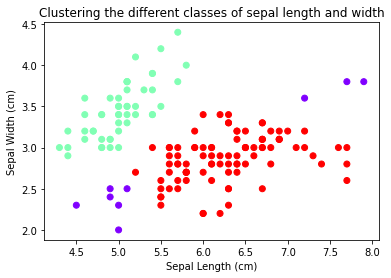

In [ ]:
# plotting the clusters using sepal_length and sepal_width
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Clustering the different classes of sepal length and width")
plt.show()

### DBSCAN clustering

DBSCAN clustering algorithm is sensitive to the eps value we choose. Here is a commonly used technique called ***Knee method***. The goal is to find the average of distances for every point to its K nearest neighbors and select the distance at which maximum curvature or a sharp change happens. The value of K is set to be equal to minPoints.

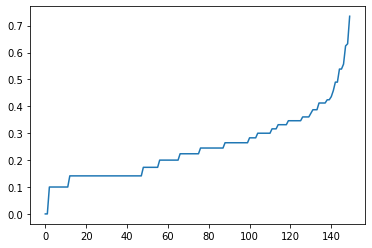

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=7)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]

plt.plot(distances)
plt.show()

The optimal value should be the value at which we see maximum curvature which in this case seems to be near 0.5.

Now fit the model and see the changes.

In [ ]:
iris_dbscan = DBSCAN(eps=0.6).fit(X)

labels = iris_dbscan.labels_
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels)
# Creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels, dtype=bool)
# Setting core and border points (all points that are not -1) to True
core_samples_mask[iris_dbscan.core_sample_indices_] = True
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Printing the number of clusters and number of noise points (outliers)
print("\nEstimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, iris_dbscan.labels_)
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]

Estimated number of clusters: 2
Estimated number of noise points: 9
Silhouette Coefficient for the Iris Dataset Clusters: 0.54


Plotting the clusters

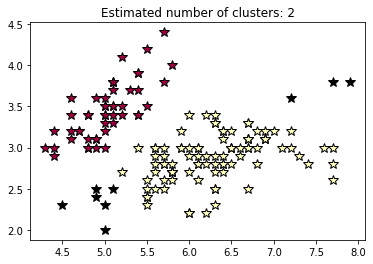

In [ ]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = "k"
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "*", markerfacecolor=col,markeredgecolor="k", markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "*", markerfacecolor=col,markeredgecolor="k", markersize=10)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()